# Huge Stock Data ... Time-Series Explanations

In [1]:
# Let us import necessary stuff!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/Users/alihassanzadeh/Downloads/nasdaq100_padding.csv')

#### <h1>  The data descripiton can be found [here!](http://cseweb.ucsd.edu/~yaq007/NASDAQ100_stock_data.html) </h1>

NASDAQ 100 stock dataset consists of stock prices of 104 corporations under NASDAQ 100 and the index value of NASDAQ 100. The frequency of the data collection is one-minute. This data covers the period from July 26, 2016 to April 28, 2017, in total 191 days.

Each day contains 391 data points (for all the corporations) and 390 data points (for NASDAQ 100 Index) from the opening to closing of the market. Data points from 2 to 391 of corporations are corresponding to the data points from 1 to 390 of NASDAQ 100.

In [268]:
df.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.80,97.80,61.15,95.4000,58.180000,58.00,127.040,26.680,165.8100,...,70.73,45.230,31.1701,95.270,81.365,52.16,33.95,48.61,38.010,4665.054
1,35.9310,96.89,97.80,61.61,95.4115,58.190000,58.12,126.060,26.730,165.9101,...,70.69,45.010,31.1900,94.170,81.540,52.15,34.10,48.74,38.140,4665.054
2,35.9044,96.95,97.57,61.98,95.5100,58.203333,57.95,126.510,26.712,166.1800,...,71.30,45.015,31.2100,94.749,81.530,52.27,34.01,48.99,38.150,4665.826
3,35.8900,96.97,97.55,62.09,95.5200,58.216667,57.96,126.280,26.740,166.1480,...,71.31,45.020,31.2100,94.310,81.710,52.30,33.96,48.95,38.195,4667.081
4,36.0080,96.96,97.73,61.89,95.5300,58.230000,58.21,126.585,26.720,165.9900,...,71.06,45.050,31.1800,94.155,81.720,52.30,34.17,48.89,38.320,4664.491


In [347]:
X = df.loc[:, df.columns != 'NDX']
y = df.loc[:, df.columns == 'NDX']

In [270]:
X.shape

(40560, 81)

In [271]:
y.shape

(40560, 1)

In [272]:
df.columns

Index(['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT',
       'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BBBY', 'BIDU', 'BIIB', 'CA', 'CELG',
       'CERN', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTRP', 'CTSH', 'DISCA', 'DISH',
       'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FOX', 'FOXA',
       'GILD', 'GOOGL', 'INTC', 'JD', 'KHC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR',
       'MAT', 'MCHP', 'MDLZ', 'MSFT', 'MU', 'MXIM', 'MYL', 'NCLH', 'NFLX',
       'NTAP', 'NVDA', 'NXPI', 'PAYX', 'PCAR', 'PYPL', 'QCOM', 'QVCA', 'ROST',
       'SBUX', 'SIRI', 'STX', 'SWKS', 'SYMC', 'TMUS', 'TRIP', 'TSCO', 'TSLA',
       'TXN', 'VIAB', 'VOD', 'VRTX', 'WBA', 'WDC', 'WFM', 'XLNX', 'YHOO',
       'NDX'],
      dtype='object')

#### A few example stock plots...

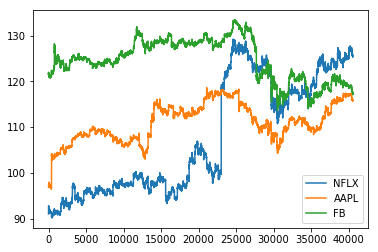

In [226]:
plt.plot(X.NFLX)
plt.plot(X.AAPL)
plt.plot(X.FB)
plt.legend()
plt.show()

#### NASDAQ Index...

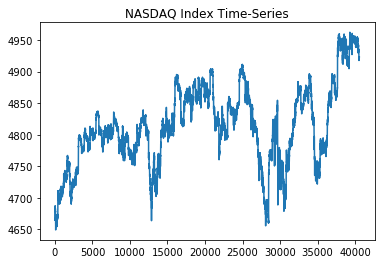

In [227]:
plt.plot(y)
plt.title('NASDAQ Index Time-Series')
plt.show()

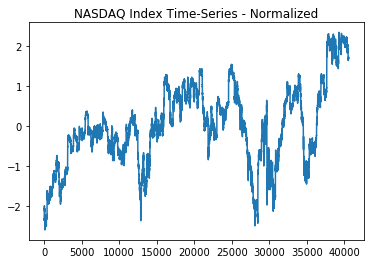

In [228]:
#Normalized Nasdaq index:

yN = (df.NDX - df.NDX.mean())/df.NDX.std()
plt.plot(yN)
plt.title('NASDAQ Index Time-Series - Normalized')
plt.show()

In [82]:
stocks = X.columns
stocks

Index(['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT',
       'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BBBY', 'BIDU', 'BIIB', 'CA', 'CELG',
       'CERN', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTRP', 'CTSH', 'DISCA', 'DISH',
       'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FOX', 'FOXA',
       'GILD', 'GOOGL', 'INTC', 'JD', 'KHC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR',
       'MAT', 'MCHP', 'MDLZ', 'MSFT', 'MU', 'MXIM', 'MYL', 'NCLH', 'NFLX',
       'NTAP', 'NVDA', 'NXPI', 'PAYX', 'PCAR', 'PYPL', 'QCOM', 'QVCA', 'ROST',
       'SBUX', 'SIRI', 'STX', 'SWKS', 'SYMC', 'TMUS', 'TRIP', 'TSCO', 'TSLA',
       'TXN', 'VIAB', 'VOD', 'VRTX', 'WBA', 'WDC', 'WFM', 'XLNX', 'YHOO'],
      dtype='object')

### Let's do a multiple linear regression, first!

In [401]:
from sklearn import linear_model

Xnp = X.values
ynp = y.values

#Let us use the first 80% of the observations as the training data, and the rest as the test data.
train_size=int (Xnp.shape[0] * 0.8)

xTrain = Xnp[:train_size-1]
yTrain=ynp[:train_size-1]
xTest = Xnp[train_size:]
yTest=ynp[train_size:]

lmr = linear_model.LinearRegression()
#lmr.fit(Xnp[:train_size-1], ynp[:train_size-1])
lmr.fit(xTrain, yTrain)

#yHat = lmr.predict(xTest)
yHat = lmr.predict(xTest)

In [128]:
lmr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
lmr.coef_

array([[  2.90396523e-01,   4.68089544e+00,   9.97697697e-01,
          2.09592427e-01,   2.33769480e-01,   2.88294348e-02,
          1.12524272e-01,   2.13000641e-01,   1.29765687e+00,
          6.56884285e-01,   4.34383086e-01,   1.24557767e+00,
          4.57516692e-01,   4.49462729e-01,   2.54423951e-01,
          2.39036080e-01,   1.07135917e+00,   9.93924147e-01,
         -5.53608711e-02,   3.50489279e+00,  -2.69311314e-02,
          4.53121550e+00,   2.17225858e+00,   3.56868303e-01,
          6.30668860e-01,   3.40249723e-01,   3.21275519e-01,
          4.35378519e-01,   1.97675654e-01,   1.02885983e+00,
          4.82593482e-01,   2.53273291e-01,   1.07522364e+00,
          2.23646884e+00,   8.54011850e-01,   2.76006933e-01,
          1.34554270e+00,   5.32078815e-01,   4.97481588e+00,
          8.01064190e-01,   1.47850206e+00,  -1.64374782e+00,
          2.30553147e+00,  -5.93037992e-02,   7.15731909e-03,
          2.83070499e-01,   1.05240170e+00,   1.31674128e+00,
        

In [113]:
lmr.intercept_

array([-7.73964421])

Since there are 81 independent variables in the multiple linear regression, and also the NASDAQ index is an index that reflects the overall status of the stock market, we expect to have relatively low error rates on the test data, and really low error rates on the training data.

In [114]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(yHat, yTest)
print('The Mean Squared Error is: {}'.format(MSE))

The Mean Squared Error is: 39.56389720558479


In [131]:
print('The Mean Squared Error on train data is: {}'.format(mean_squared_error(lmr.predict(xTrain), yTrain)))

The Mean Squared Error on train data is: 0.7688502932567824


In [115]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(yHat, yTest)
print('The Mean Absolute Error is: {}'.format(MAE))

The Mean Absolute Error is: 4.963437672785152


In [133]:
print('The Mean Absolute Error on train data is: {}'.format(mean_absolute_error(lmr.predict(xTrain), yTrain)))

The Mean Absolute Error on train data is: 0.6812512367824596


In [116]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [117]:
print(mean_absolute_percentage_error(yTest,yHat))

0.101332775357


In [136]:
print('The Mean Absolute Percentage Error on train data is: {}'.format(mean_absolute_percentage_error(lmr.predict(xTrain), yTrain)))

The Mean Absolute Percentage Error on train data is: 0.014197668759299325


### Here is the summary result of multiple linear regression using SKLearn:

| Error Measure | MSE   | MAE | MAPE   |
|------|------|------|------|
|   On Train Data  | 0.77 |   0.68  | 0.014|
|   On Test Data  | 39.56 |   4.96  | 0.1|

#### Let's use a different method just to make sure we've got the right results...

In [119]:
import statsmodels.api as sm
model = sm.OLS(yTrain,xTrain)
results = model.fit()
results

In [120]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.197e+10
Date:                Mon, 18 Jun 2018   Prob (F-statistic):               0.00
Time:                        23:43:40   Log-Likelihood:                -41784.
No. Observations:               32447   AIC:                         8.373e+04
Df Residuals:                   32366   BIC:                         8.441e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2984      0.017     17.373      0.0

In [121]:
print('The Mean Squared Error is: {}'.format(mean_squared_error(results.predict(xTest), yTest)))

The Mean Squared Error is: 43.466270488481754


In [132]:
print('The Mean Squared Error on train data is: {}'.format(mean_squared_error(results.predict(xTrain), yTrain)))

The Mean Squared Error on train data is: 0.7692159930207092


In [122]:
print('The Mean Absolute Error is: {}'.format(mean_absolute_error(results.predict(xTest), yTest)))

The Mean Absolute Error is: 5.227400286549383


In [134]:
print('The Mean Absolute Error on train data is: {}'.format(mean_absolute_error(results.predict(xTrain), yTrain)))

The Mean Absolute Error on train data is: 0.6812627599007516


In [123]:
print('The Mean Absolute Percentage Error is: {}'.format(mean_absolute_percentage_error(yTest, results.predict(xTest))))

The Mean Absolute Percentage Error is: 1.5480213614873306


In [137]:
print('The Mean Absolute Percentage Error on train data is: {}'.format(mean_absolute_percentage_error(results.predict(xTrain), yTrain)))

The Mean Absolute Percentage Error on train data is: 1.2718427140563209


### Here is the summary result of multiple linear regression using statsmodels:

| Error Measure | MSE   | MAE | MAPE   |
|------|------|------|------|
|   On Train Data  | 0.77 |   0.68  | 1.27|
|   On Test Data  | 43.46 |   5.23  | 1.55|

#### Conclusion: there are small differences in different values (coefficients, error measures, etc.), but they are relatively the same. One big difference though is in MAPE! I did write a function for calculating MAPE, and I believe it is correct. Not sure why this difference is there... 

### Examples of modifications in the data set:

#### Let's take Google as an example. Here is the original time-series plot of Google stock data:

<img src="https://upload.wikimedia.org/wikipedia/commons/3/30/Googlelogo.png",width=300,height=70>

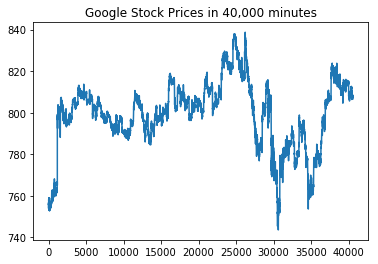

In [273]:
plt.plot(df.GOOGL)
plt.title('Google Stock Prices in 40,000 minutes')
plt.show()

#### Applying the three changes (linear increase, linear decrease, and flattening) on the last few data points

In [290]:
Google = X.GOOGL.loc[:]
Temp_Google1 = Google.loc[:] #Change code: flat
Temp_Google2 = Google.loc[:] #Change code: increase
Temp_Google3 = Google.loc[:] #Change code: decrease

### 1- Last 50 data points:

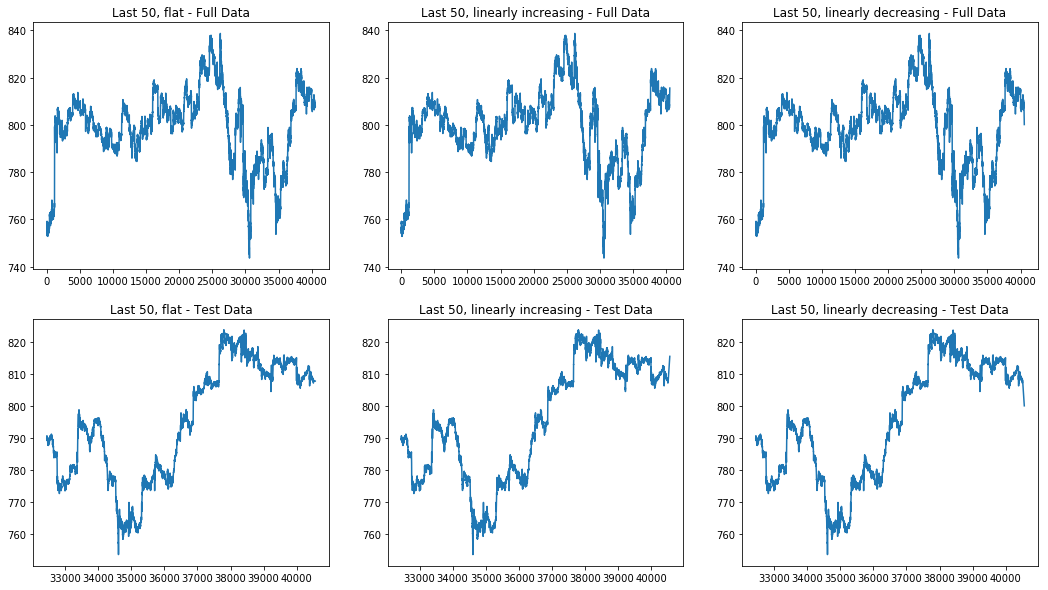

In [292]:
k=50

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp_Google1[X.shape[0]-k:]= Temp_Google1[X.shape[0]-k] * np.ones((len(Temp_Google1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp_Google1)
plt.title('Last 50, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp_Google1[train_size:])
plt.title('Last 50, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp_Google2.max() - Temp_Google2.mean()
dif=dif*0.2

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp_Google2[X.shape[0]-k:])):
    Temp_Google2[X.shape[0]-k+q] = Temp_Google2[X.shape[0]-k] + q * (dif/len(Temp_Google2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp_Google2)
plt.title('Last 50, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp_Google2[train_size:])
plt.title('Last 50, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp_Google3[X.shape[0]-k:])):
    Temp_Google3[X.shape[0]-k+i] = Temp_Google3[X.shape[0]-k] - i * (dif/len(Temp_Google3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp_Google3)
plt.title('Last 50, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp_Google3[train_size:])
plt.title('Last 50, linearly decreasing - Test Data')
plt.show()

### 2- Last 100 data points:

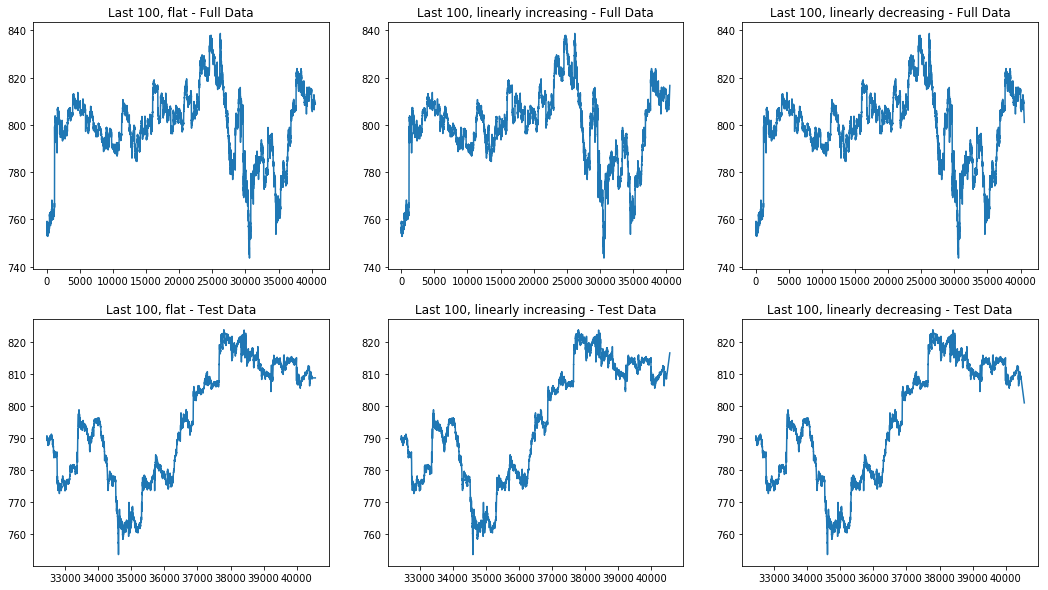

In [277]:
k=100

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp_Google1[X.shape[0]-k:]= Temp_Google1[X.shape[0]-k] * np.ones((len(Temp_Google1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp_Google1)
plt.title('Last 100, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp_Google1[train_size:])
plt.title('Last 100, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp_Google2.max() - Temp_Google2.mean()
dif=dif*0.2

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp_Google2[X.shape[0]-k:])):
    Temp_Google2[X.shape[0]-k+q] = Temp_Google2[X.shape[0]-k] + q * (dif/len(Temp_Google2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp_Google2)
plt.title('Last 100, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp_Google2[train_size:])
plt.title('Last 100, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp_Google3[X.shape[0]-k:])):
    Temp_Google3[X.shape[0]-k+i] = Temp_Google3[X.shape[0]-k] - i * (dif/len(Temp_Google3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp_Google3)
plt.title('Last 100, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp_Google3[train_size:])
plt.title('Last 100, linearly decreasing - Test Data')
plt.show()

### 3- Last 500 data points:

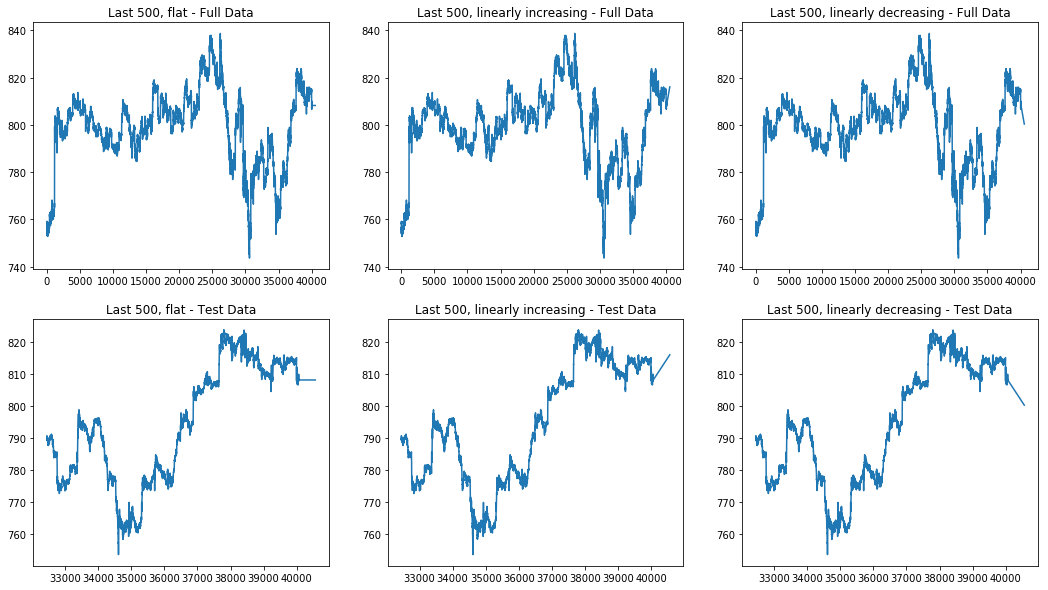

In [278]:
k=500

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp_Google1[X.shape[0]-k:]= Temp_Google1[X.shape[0]-k] * np.ones((len(Temp_Google1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp_Google1)
plt.title('Last 500, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp_Google1[train_size:])
plt.title('Last 500, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp_Google2.max() - Temp_Google2.mean()
dif=dif*0.2

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp_Google2[X.shape[0]-k:])):
    Temp_Google2[X.shape[0]-k+q] = Temp_Google2[X.shape[0]-k] + q * (dif/len(Temp_Google2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp_Google2)
plt.title('Last 500, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp_Google2[train_size:])
plt.title('Last 500, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp_Google3[X.shape[0]-k:])):
    Temp_Google3[X.shape[0]-k+i] = Temp_Google3[X.shape[0]-k] - i * (dif/len(Temp_Google3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp_Google3)
plt.title('Last 500, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp_Google3[train_size:])
plt.title('Last 500, linearly decreasing - Test Data')
plt.show()

### 4- Last 1000 data points:

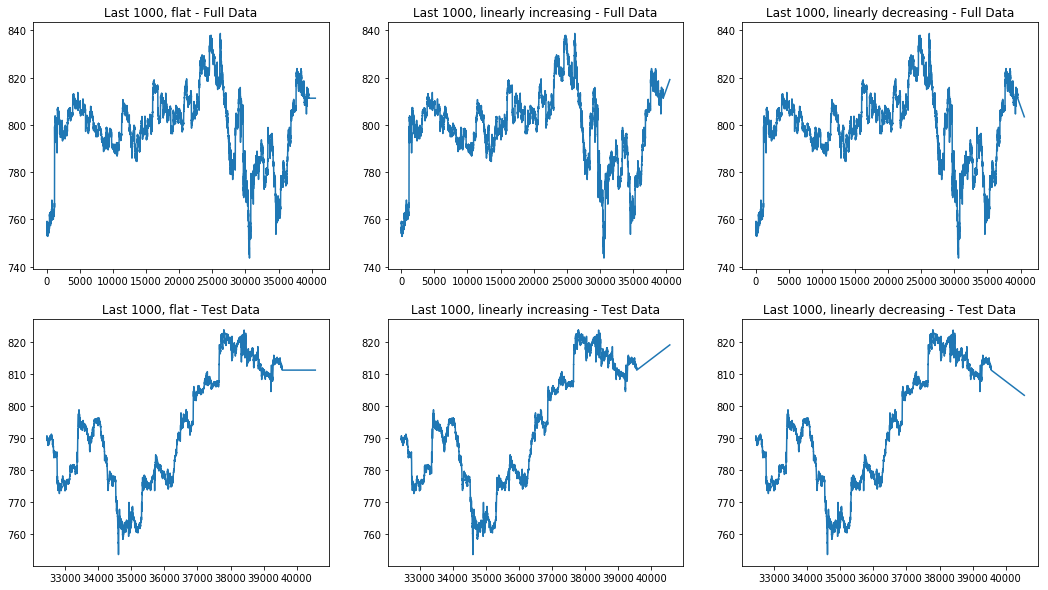

In [279]:
k=1000

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp_Google1[X.shape[0]-k:]= Temp_Google1[X.shape[0]-k] * np.ones((len(Temp_Google1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp_Google1)
plt.title('Last 1000, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp_Google1[train_size:])
plt.title('Last 1000, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp_Google2.max() - Temp_Google2.mean()
dif=dif*0.2

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp_Google2[X.shape[0]-k:])):
    Temp_Google2[X.shape[0]-k+q] = Temp_Google2[X.shape[0]-k] + q * (dif/len(Temp_Google2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp_Google2)
plt.title('Last 1000, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp_Google2[train_size:])
plt.title('Last 1000, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp_Google3[X.shape[0]-k:])):
    Temp_Google3[X.shape[0]-k+i] = Temp_Google3[X.shape[0]-k] - i * (dif/len(Temp_Google3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp_Google3)
plt.title('Last 1000, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp_Google3[train_size:])
plt.title('Last 1000, linearly decreasing - Test Data')
plt.show()

### 5- Last 2000 data points:

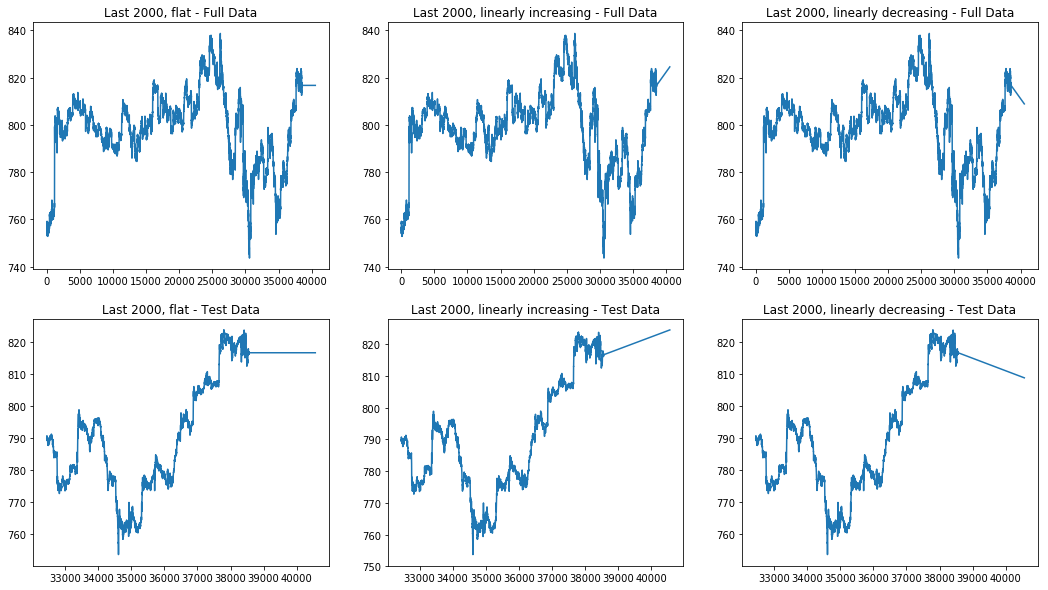

In [294]:
k=2000

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp_Google1[X.shape[0]-k:]= Temp_Google1[X.shape[0]-k] * np.ones((len(Temp_Google1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp_Google1)
plt.title('Last 2000, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp_Google1[train_size:])
plt.title('Last 2000, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp_Google2.max() - Temp_Google2.mean()
dif=dif*0.2

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp_Google2[X.shape[0]-k:])):
    Temp_Google2[X.shape[0]-k+q] = Temp_Google2[X.shape[0]-k] + q * (dif/len(Temp_Google2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp_Google2)
plt.title('Last 2000, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp_Google2[train_size:])
plt.title('Last 2000, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp_Google3[X.shape[0]-k:])):
    Temp_Google3[X.shape[0]-k+i] = Temp_Google3[X.shape[0]-k] - i * (dif/len(Temp_Google3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp_Google3)
plt.title('Last 2000, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp_Google3[train_size:])
plt.title('Last 2000, linearly decreasing - Test Data')
plt.show()

### Now, let's take a look at the Amazon stock prices, as well:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Amazon_logo_plain.svg",width=300,height=70>

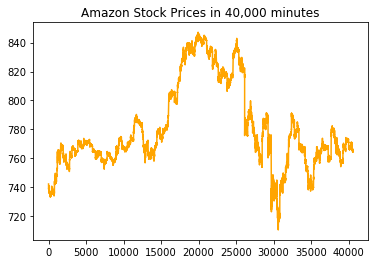

In [237]:
plt.plot(df.AMZN, color='orange')
plt.title('Amazon Stock Prices in 40,000 minutes')
plt.show()

In [238]:
Amazon = X.AMZN[:]
Temp1 = Amazon[:] #Change code: flat
Temp2 = Amazon[:] #Change code: increase
Temp3 = Amazon[:] #Change code: decrease

Since the gap between the largest recorded stock price, and the average AMZN stock price is relatively large, for the last few data points, I will take 10 percent of the difference between the max and mean of AMZN stock prices as a reference to the linearly increasing and decreasing part of the modified data.

### 1- Last 50 data points:

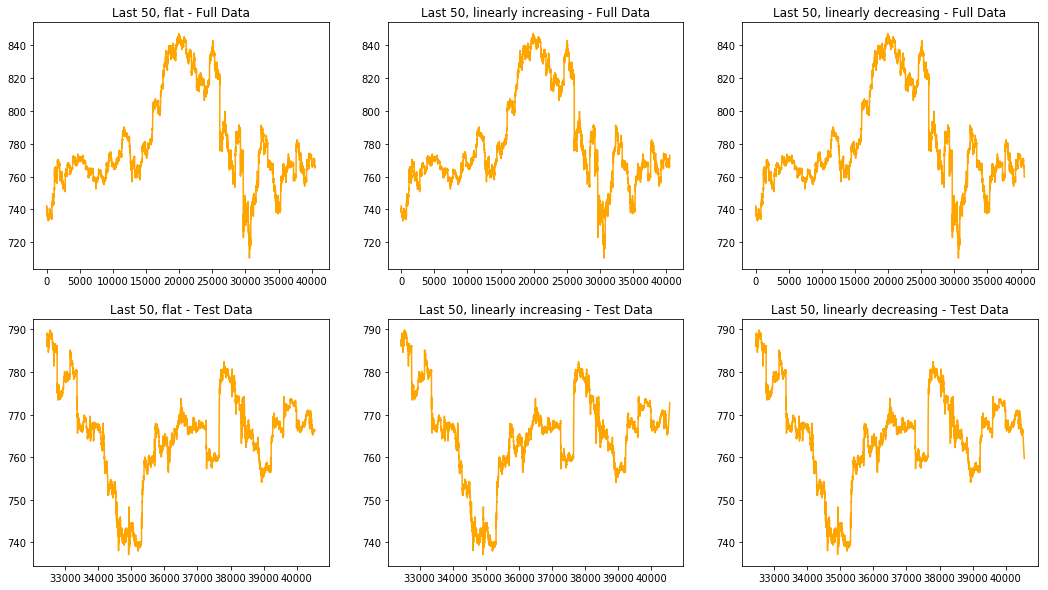

In [243]:
k=50

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp1[X.shape[0]-k:]= Temp1[X.shape[0]-k] * np.ones((len(Temp1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp1, color='orange')
plt.title('Last 50, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp1[train_size:], color='orange')
plt.title('Last 50, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp2.max() - Temp2.mean()
dif=dif*0.1

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp2[X.shape[0]-k:])):
    Temp2[X.shape[0]-k+q] = Temp2[X.shape[0]-k] + q * (dif/len(Temp2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp2, color='orange')
plt.title('Last 50, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp2[train_size:], color='orange')
plt.title('Last 50, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp3[X.shape[0]-k:])):
    Temp3[X.shape[0]-k+i] = Temp3[X.shape[0]-k] - i * (dif/len(Temp3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp3, color='orange')
plt.title('Last 50, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp3[train_size:], color='orange')
plt.title('Last 50, linearly decreasing - Test Data')
plt.show()

### 2- Last 100 data points:

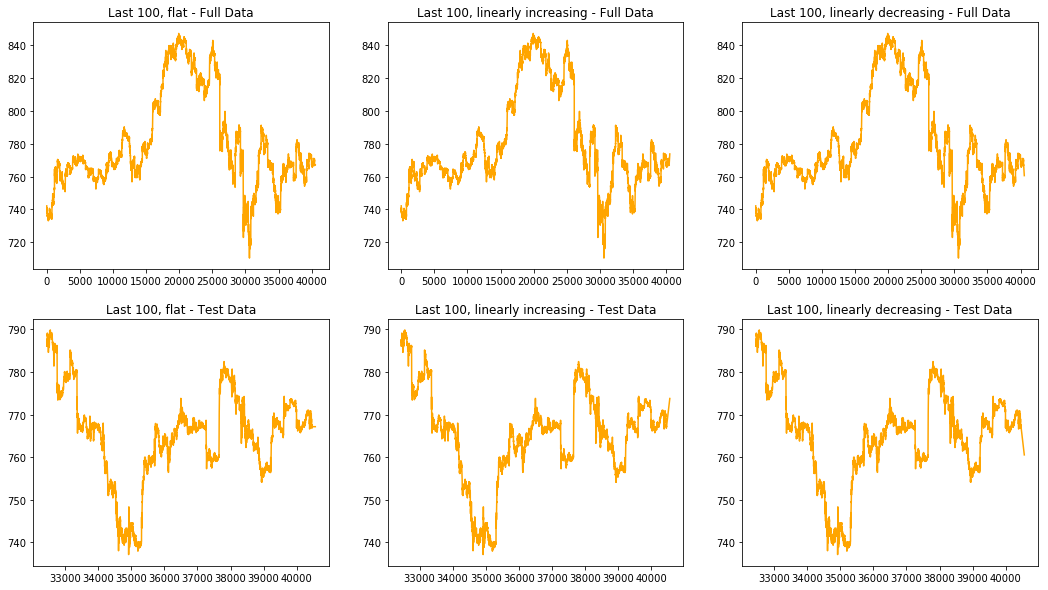

In [244]:
k=100

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp1[X.shape[0]-k:]= Temp1[X.shape[0]-k] * np.ones((len(Temp1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp1, color='orange')
plt.title('Last 100, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp1[train_size:], color='orange')
plt.title('Last 100, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp2.max() - Temp2.mean()
dif=dif*0.1

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp2[X.shape[0]-k:])):
    Temp2[X.shape[0]-k+q] = Temp2[X.shape[0]-k] + q * (dif/len(Temp2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp2, color='orange')
plt.title('Last 100, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp2[train_size:], color='orange')
plt.title('Last 100, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp3[X.shape[0]-k:])):
    Temp3[X.shape[0]-k+i] = Temp3[X.shape[0]-k] - i * (dif/len(Temp3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp3, color='orange')
plt.title('Last 100, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp3[train_size:], color='orange')
plt.title('Last 100, linearly decreasing - Test Data')
plt.show()

### 3- Last 500 data points:

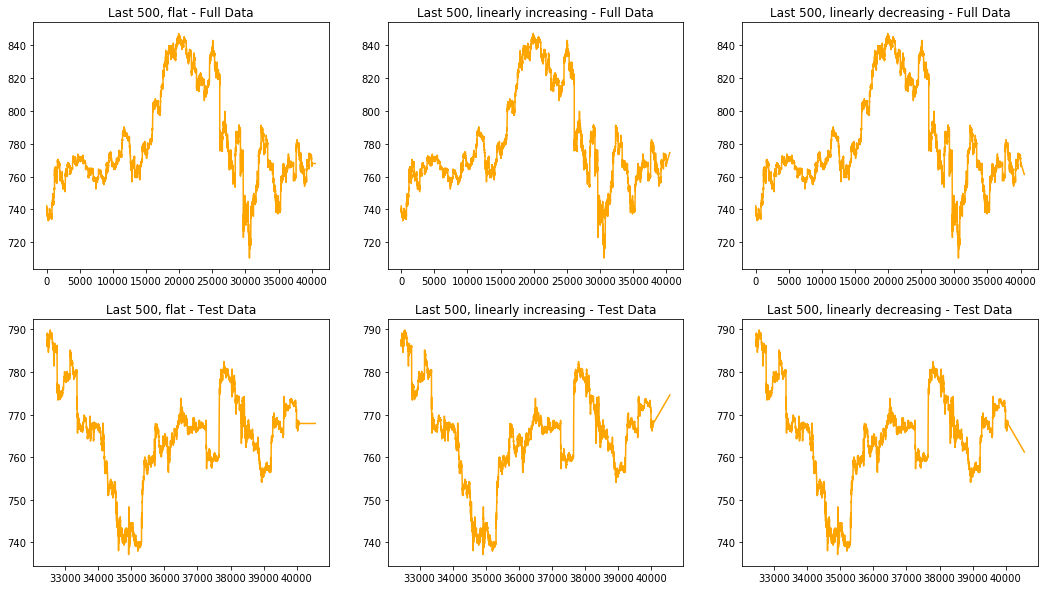

In [245]:
k=500

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp1[X.shape[0]-k:]= Temp1[X.shape[0]-k] * np.ones((len(Temp1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp1, color='orange')
plt.title('Last 500, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp1[train_size:], color='orange')
plt.title('Last 500, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp2.max() - Temp2.mean()
dif=dif*0.1

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp2[X.shape[0]-k:])):
    Temp2[X.shape[0]-k+q] = Temp2[X.shape[0]-k] + q * (dif/len(Temp2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp2, color='orange')
plt.title('Last 500, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp2[train_size:], color='orange')
plt.title('Last 500, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp3[X.shape[0]-k:])):
    Temp3[X.shape[0]-k+i] = Temp3[X.shape[0]-k] - i * (dif/len(Temp3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp3, color='orange')
plt.title('Last 500, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp3[train_size:], color='orange')
plt.title('Last 500, linearly decreasing - Test Data')
plt.show()

### 4- Last 1000 data points:

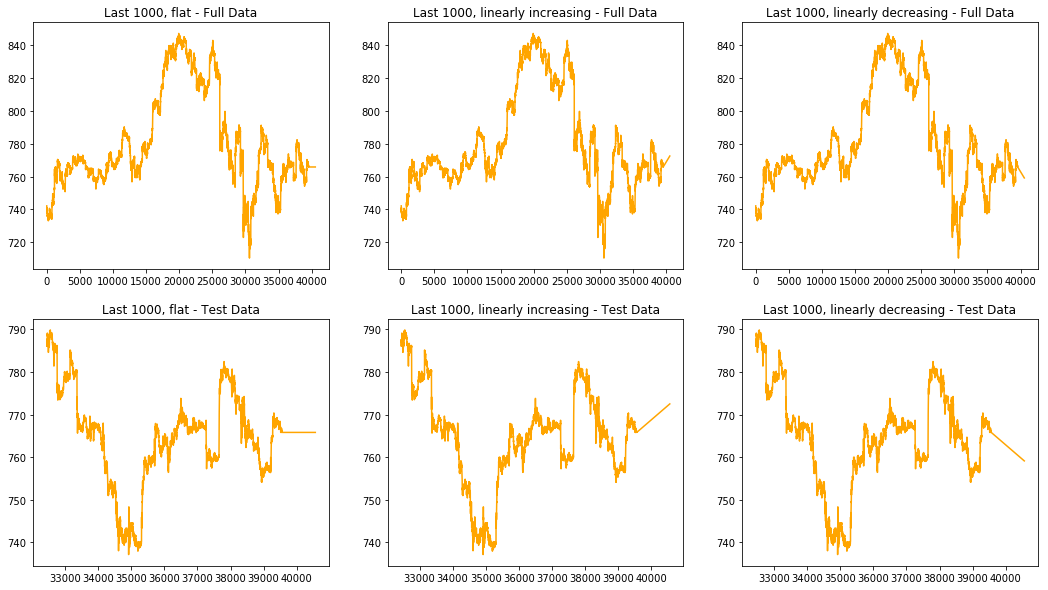

In [246]:
k=1000

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp1[X.shape[0]-k:]= Temp1[X.shape[0]-k] * np.ones((len(Temp1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp1, color='orange')
plt.title('Last 1000, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp1[train_size:], color='orange')
plt.title('Last 1000, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp2.max() - Temp2.mean()
dif=dif*0.1

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp2[X.shape[0]-k:])):
    Temp2[X.shape[0]-k+q] = Temp2[X.shape[0]-k] + q * (dif/len(Temp2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp2, color='orange')
plt.title('Last 1000, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp2[train_size:], color='orange')
plt.title('Last 1000, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp3[X.shape[0]-k:])):
    Temp3[X.shape[0]-k+i] = Temp3[X.shape[0]-k] - i * (dif/len(Temp3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp3, color='orange')
plt.title('Last 1000, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp3[train_size:], color='orange')
plt.title('Last 1000, linearly decreasing - Test Data')
plt.show()

### 5- Last 2000 data points:

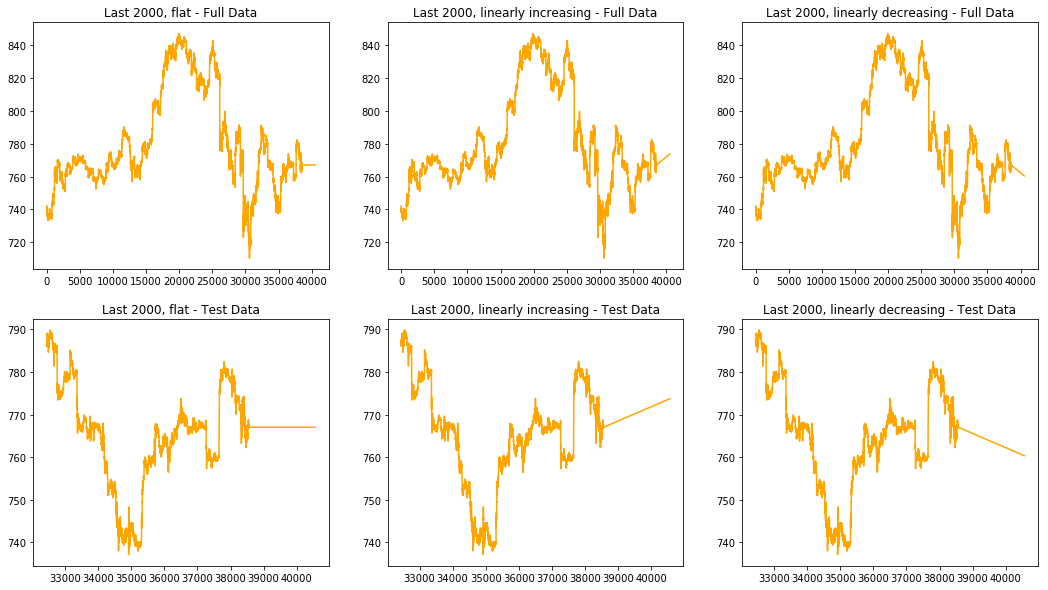

In [310]:
k=2000

f = plt.figure(figsize=(18,10))

#########################################
#1st change: making last few data points equal to the same value!

Temp1[X.shape[0]-k:]= Temp1[X.shape[0]-k] * np.ones((len(Temp1[X.shape[0]-k:])))
ax1 = f.add_subplot(2,3,1)
ax1.plot(Temp1, color='orange')
plt.title('Last 2000, flat - Full Data')
#plt.show()
ax2 = f.add_subplot(2,3,4)
ax2.plot(Temp1[train_size:], color='orange')
plt.title('Last 2000, flat - Test Data')
#plt.show()

#########################################
#2nd change: last few data points linearly increasing!

dif = Temp2.max() - Temp2.mean()
dif=dif*0.1

#I am taking 20% of the difference between average and largest value in stock prices.

for q in range (len(Temp2[X.shape[0]-k:])):
    Temp2[X.shape[0]-k+q] = Temp2[X.shape[0]-k] + q * (dif/len(Temp2[X.shape[0]-k:]))

ax3 = f.add_subplot(2,3,2)
ax3.plot(Temp2, color='orange')
plt.title('Last 2000, linearly increasing - Full Data')
#plt.show()
ax4 = f.add_subplot(2,3,5)
ax4.plot(Temp2[train_size:], color='orange')
plt.title('Last 2000, linearly increasing - Test Data')
#plt.show()

#########################################
#3rd change: last few data points linearly decreasing!

for i in range (len(Temp3[X.shape[0]-k:])):
    Temp3[X.shape[0]-k+i] = Temp3[X.shape[0]-k] - i * (dif/len(Temp3[X.shape[0]-k:]))

ax5 = f.add_subplot(2,3,3)
ax5.plot(Temp3, color='orange')
plt.title('Last 2000, linearly decreasing - Full Data')
#plt.show()
ax6 = f.add_subplot(2,3,6)
ax6.plot(Temp3[train_size:], color='orange')
plt.title('Last 2000, linearly decreasing - Test Data')
plt.show()

### Perturbations in the data... Looping over all the stocks (changing only one stock price at a time)

As our first experiment, I am going to loop through all the 81 stocks, and at each iteration, I will apply the three possible changes (flattening the data, linearly increasing, and linearly decreasing) over 5 possible interval of data points (i.e., last {50,100,500,1000,2000} data points). 

There should be a threshold value in which we record all the modifications in the data that result in a change in the response variable (NASDAQ Index) larger than this threshold. We can try different values of such threshold, and we can compare the results. For now, since I am trying to test the idea on the multiple linear regression model, let us try the following threshold values:

Possible lamda's = {0.01,0.1,1,10,50}

In [434]:
Lambda = 15

Changes = ['i','d','f']
Intervals = [50,100,500,1000,2000]

xstocks =[]
xchanges = []
xintervals = []
xMSEs=[]


NDX = y.copy()
    
mse2=mean_squared_error(lmr.predict(X[train_size:]),NDX[train_size:])

for s in stocks:
    for i in Intervals:
        for c in Changes:
            
            #Let's make a python "copy" of the pandas dataframes in order to avoid changing the original values...
            data = X.copy()
            
            if (c == 'f'):
                data[s][data.shape[0]-i:]= data[s][X.shape[0]-i] * np.ones((len(data[s][data.shape[0]-i:])))
                mse1=mean_squared_error(lmr.predict(data[train_size:]),NDX[train_size:])

                if( abs(mse1-mse2) > Lambda ):
                    xstocks.append(s)
                    xchanges.append(c)
                    xintervals.append(i)
                    xMSEs.append(mse1)
            
            if (c == 'i'):
                
                dif = data[s].max() - data[s].mean()
                dif=dif*0.2
                
                for q in range (len(data[s][data.shape[0]-i:])):
                    data[s][data.shape[0]-i+q] = data[s][X.shape[0]-i] + q * (dif/len(data[s][data.shape[0]-i:]))
                
                mse1=mean_squared_error(lmr.predict(data[train_size:]),NDX[train_size:])
                
                if( abs(mse1-mse2) > Lambda ):
                    xstocks.append(s)
                    xchanges.append(c)
                    xintervals.append(i)
                    xMSEs.append(mse1)
                
            if (c == 'd'):
                
                dif = data[s].max() - data[s].mean()
                dif=dif*0.2
                
                for q in range (len(data[s][data.shape[0]-i:])):
                    data[s][data.shape[0]-i+q] = data[s][X.shape[0]-i] - q * (dif/len(data[s][data.shape[0]-i:]))
                
                
                mse1=mean_squared_error(lmr.predict(data[train_size:]),NDX[train_size:])

                if( abs(mse1-mse2) > Lambda ):
                    xstocks.append(s)
                    xchanges.append(c)
                    xintervals.append(i)
                    xMSEs.append(mse1)

                    
#Let's put all the results into one dataframe:

Reg_Results = pd.DataFrame(
{'stock' : xstocks,
 'change': xchanges,
 'interval' : xintervals,
 'MSE' : xMSEs
    
})

print('Total of' ,Reg_Results.shape[0], 'cases recorded (using Lambda =', Lambda, ').')
Reg_Results.head()

Total of 12 cases recorded (using Lambda = 15 ).


,MSE,change,interval,stock
0,54.954712,d,1000,AAPL
1,78.187645,d,2000,AAPL
2,54.966726,d,1000,AMZN
3,23.855663,i,2000,AMZN
4,57.575691,d,2000,AMZN


### Results of getting the regression predictions on various data sets (modifications of the original data set):

The DataFrame <span style="color:blue">"Reg_Results"</span> lists all the cases in which the new MSE has a distance of more than <span style="color:blue">Lambda</span> from the original MSE (39.5639). I have used 1 as the threshold value for the absolute value of the difference between the two MSE's. It turns out that there are a lot of cases that satisfy the aforementioned condition. To be precise, there are total of 329 cases recorded in the resulting dataframe. Let us try higher threshold values, as well (e.g., Lambda = {5,10,15}). Note that I am using large values only because we are doing a multiple linear regression predictions. For the actual experiment which is dealing with RNN's, since the error rates are supposed to be really low, we will use much lower threshold values.

One last note is that: I have used MSE over the test data set to see if there is a considerable difference after modifying the data set. In the actual experiment, I am going to use the single prediction of the response variable (i.e., NASDAQ Index) on the very last minute as the reference.

In [427]:
print('Total of' ,Reg_Results.shape[0], 'cases recorded (using Lambda =',Lambda,').')

Total of 329 cases recorded (using Lambda = 1 ).


#### Below is the results of modifying the data set using higher threshold values, number of recorded significant cases, and also the actual list of significant cases:

| Change code | Explanation   | 
|------|------|
|   'i'  | linearly increasing |
|   'd'  | linearly decreasing |
|   'f'  | flattening |

### Lambda = 5

In [429]:
print('Total of' ,Reg_Results.shape[0], 'cases recorded (using Lambda =',Lambda,').')

Total of 75 cases recorded (using Lambda = 5 ).


In [430]:
Reg_Results

,MSE,change,interval,stock
0,33.179473,i,500,AAPL
1,32.320458,i,1000,AAPL
2,54.954712,d,1000,AAPL
3,29.824769,i,2000,AAPL
4,78.187645,d,2000,AAPL
5,49.867312,f,2000,AAPL
6,28.159259,i,2000,ADBE
7,31.502430,f,2000,ADBE
8,44.726441,d,2000,ADP
9,44.711995,d,2000,ALXN


## Lambda = 10

In [432]:
print('Total of' ,Reg_Results.shape[0], 'cases recorded (using Lambda =',Lambda,').')

Total of 24 cases recorded (using Lambda = 10 ).


In [433]:
Reg_Results

,MSE,change,interval,stock
0,54.954712,d,1000,AAPL
1,78.187645,d,2000,AAPL
2,49.867312,f,2000,AAPL
3,28.159259,i,2000,ADBE
4,28.937752,i,2000,AMGN
5,54.966726,d,1000,AMZN
6,23.855663,i,2000,AMZN
7,57.575691,d,2000,AMZN
8,27.595433,i,2000,CELG
9,55.910582,d,1000,CMCSA


## Lambda = 15

In [435]:
print('Total of' ,Reg_Results.shape[0], 'cases recorded (using Lambda =',Lambda,').')

Total of 12 cases recorded (using Lambda = 15 ).


In [436]:
Reg_Results

,MSE,change,interval,stock
0,54.954712,d,1000,AAPL
1,78.187645,d,2000,AAPL
2,54.966726,d,1000,AMZN
3,23.855663,i,2000,AMZN
4,57.575691,d,2000,AMZN
5,55.910582,d,1000,CMCSA
6,55.040559,d,2000,CMCSA
7,18.630962,i,2000,FB
8,24.425424,f,2000,FB
9,19.581844,i,2000,GOOGL


In [416]:
Reg_Results[Reg_Results.stock=='GOOGL']

,MSE,change,interval,stock
38,44.625432,d,500,GOOGL
39,33.174110,i,1000,GOOGL
40,45.516442,d,1000,GOOGL
41,19.581844,i,2000,GOOGL
42,26.938329,f,2000,GOOGL


In [417]:
Reg_Results[Reg_Results.stock=='AMZN']

,MSE,change,interval,stock
12,45.381870,d,500,AMZN
13,54.966726,d,1000,AMZN
14,23.855663,i,2000,AMZN
15,57.575691,d,2000,AMZN


## (<span style="color:red">TODO</span>: complete this part!)

### Perturbations in the data... Randomly picking subset of stocks to modify

In [ ]:
import random
from sklearn.metrics import mean_squared_error

N=1000
stocks = [0, 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 ,9 ]
stocks = X.columns
changes = [0,1,2]

train_size = int(X.shape[0] * 0.8)

Index=np.arange(1000).reshape(1000,1)
MSEs=np.zeros(1000).reshape(1000,1)
ks=np.zeros(1000).reshape(1000,1)

for i in range(N):
    
    #Perturbed X matrix:
    New_X = X[train_size:]
    
    k=random.randint(2,6)
    ks[i,0] = k
    rand_smpl = [ stocks[i] for i in sorted(random.sample(range(len(stocks)), k)) ]
    for j in range(k):
        
        rnd_changes=random.randint(1,3)
        if (rnd_changes==1):
            New_X[:,rand_smpl[j]]= New_X[0,rand_smpl[j]]*np.ones((len(New_X[:,rand_smpl[j]])))
        if (rnd_changes ==2):
            dif = model.X[:,rand_smpl[j]].max() - model.X[:,rand_smpl[j]].mean()
            dif=dif*0.4
            for q in range (len(New_X[:,rand_smpl[j]])):
                New_X[q,rand_smpl[j]] = New_X[q,rand_smpl[j]] + q * (dif/len(New_X[:,rand_smpl[j]]))
        if (rnd_changes ==3):
            dif = model.X[:,rand_smpl[j]].mean() - model.X[:,rand_smpl[j]].min()
            dif=dif*0.4
            for q in range (len(New_X[:,rand_smpl[j]])):
                New_X[q,rand_smpl[j]] = New_X[q,rand_smpl[j]] - q * (dif/len(New_X[:,rand_smpl[j]]))
    
    
    y_pred = np.zeros(len(New_X[:,0]))
    T=10

    i = 0
    while i < len(y_pred):
        batch_idx = np.array(range(len(y_pred)))[i : (i + 5)]
        X = np.zeros((len(batch_idx), T - 1, model.X.shape[1]))
        y_history = np.zeros((len(batch_idx), T - 1))
        for j in range(len(batch_idx)):
            X[j, :, :] = New_X[range(batch_idx[j] - T, batch_idx[j] - 1), :]
            y_history[j, :] = model.y[range(batch_idx[j] - T,  batch_idx[j] - 1)]
        
        y_history = Variable(torch.from_numpy(y_history).type(torch.FloatTensor).cpu())
        _, input_encoded = model.encoder(Variable(torch.from_numpy(X).type(torch.FloatTensor).cpu()))
        y_pred[i:(i + model.batch_size)] = model.decoder(input_encoded, y_history).cpu().data.numpy()[:, 0]
        i += model.batch_size
    
    
    print("i=",i)
    print(mean_squared_error(model.y[model.train_size:], y_pred))
    MSEs[i,0]=mean_squared_error(model.y[model.train_size:], y_pred)
    
Results = np.concatenate((Index,MSEs),axis=1)
Results = np.concatenate((Results,ks),axis=1)
ResultsPD=pd.DataFrame(Results,index=np.arange(N))

In [54]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(yHat, y)
print('The Mean Squared Error is: {}'.format(MSE))

The Mean Squared Error is: 0.9830728605180838


In [14]:
print(mean_squared_error(y,reg.predict(X)))

0.983072860518113


In [77]:
print(mean_squared_error(yHat,ynp))

0.983072860518


In [78]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(yHat, ynp)
print('The Mean Absolute Error is: {}'.format(MAE))

The Mean Absolute Error is: 0.7721409718412837


In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100